## Aufgabe 2

In [22]:
#Pakete
from skimage.io import imread
from skimage.filters import gaussian,laplace,sobel
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

### Aufgabe 2.1

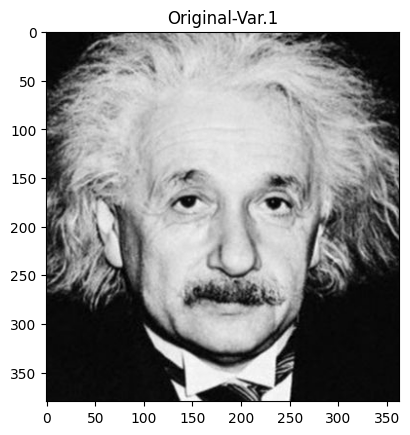

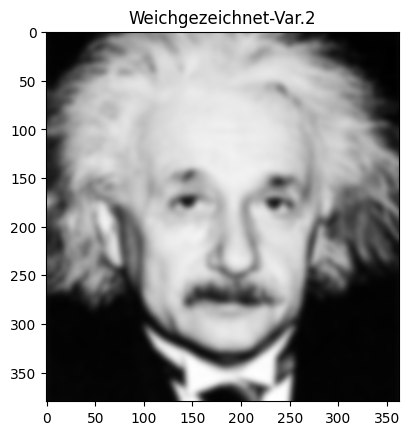

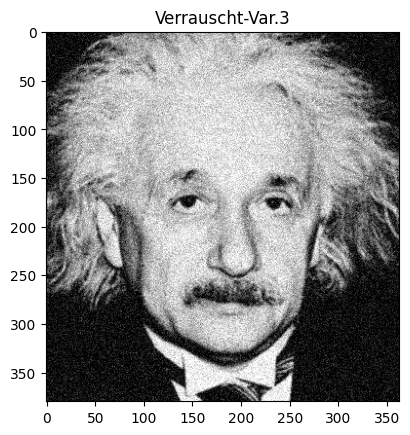

In [23]:
img=imread('./bilder-Wk09/einstein.png')/255
smoothingImg=gaussian(img,3)
noisyImg=random_noise(img,'gaussian',var=0.01)

plt.figure(1)
plt.title('Original-Var.1')
plt.imshow(img,cmap='gray')

plt.figure(2)
plt.title('Weichgezeichnet-Var.2')
plt.imshow(smoothingImg,cmap='gray')

plt.figure(3)
plt.title('Verrauscht-Var.3')
plt.imshow(noisyImg,cmap='gray')

## Aufgabe 2.2

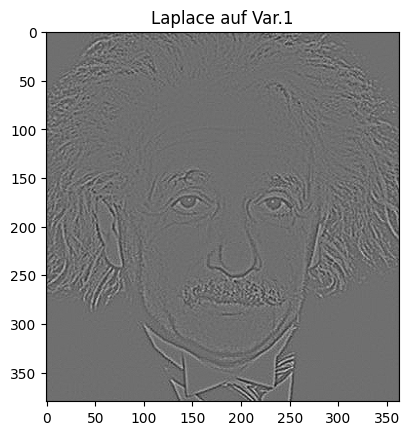

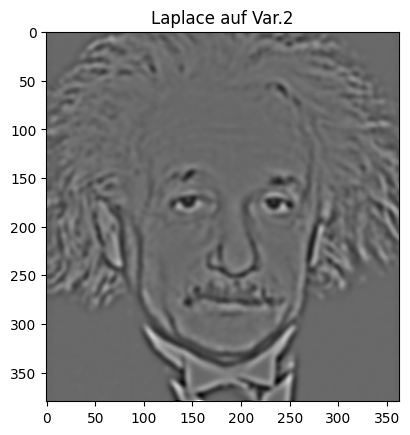

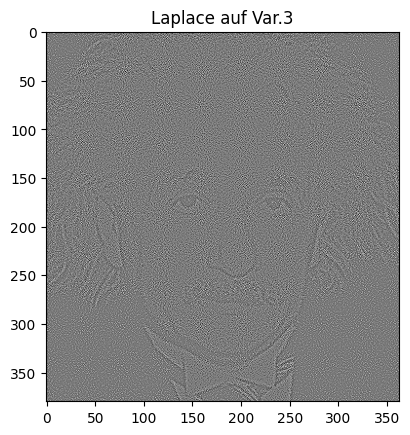

In [24]:
laplaceImg=laplace(img)
laplaceSmoothing=laplace(smoothingImg)
laplaceNoisy=laplace(noisyImg)

plt.figure(4)
plt.title('Laplace auf Var.1')
plt.imshow(laplaceImg,cmap='gray')

plt.figure(5)
plt.title('Laplace auf Var.2')
plt.imshow(laplaceSmoothing,cmap='gray')


plt.figure(6)
plt.title('Laplace auf Var.3')
plt.imshow(laplaceNoisy,cmap='gray')

### Beschreibung:
Es sind 3 Graubilder entstanden. Es sind drei Kantenbilder. Variante zwei ist am schärfsten, da es vorher in Aufg.2.1 geglättet wurde.

## Aufg 2.3

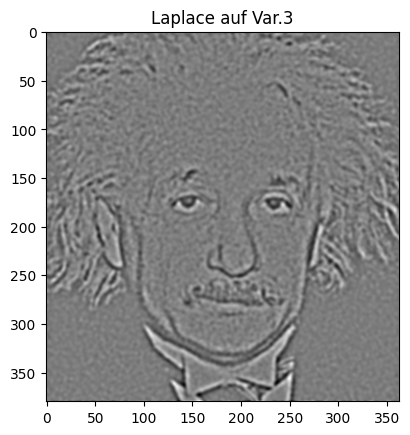

In [25]:
laplaceSmoothNoisy=laplace(gaussian(noisyImg,2))

plt.figure(7)
plt.title('Laplace auf Var.3')
plt.imshow(laplaceSmoothNoisy,cmap='gray')


#### Verbesserungsmöglichkeiten:
a) Laplace anwenden 
b) geringere Variance einstellen

## Aufgabe 2.4

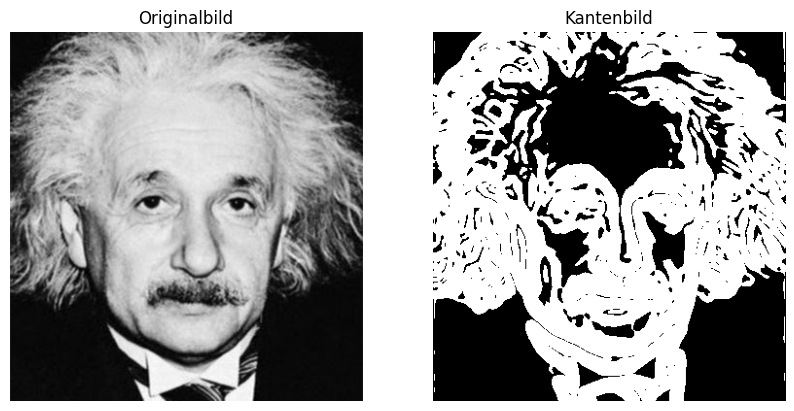

In [26]:

#Importieren der weiteren erforderlichen Pakete

from skimage.util import img_as_ubyte

# Laden des Bildes

img = imread('./bilder-Wk09/einstein.png')

#  Anwenden eines Gauß-Filters auf das Bild

smoothImg = gaussian(img, sigma=3)

#: Berechnen des Sobel-Gradienten des Bildes

gradient = sobel(smoothImg)

#Anwenden eines Schwellenwerts auf den Gradienten

threshold = 0.008  # Schwellenwert, durch Testen herausgefunden
strong_edges = gradient > threshold

# Sortieren der schwachen Kantenpixel

weak_edges = np.logical_and(gradient > 0, gradient <= threshold)
sorted_weak_edges = np.flip(np.argsort(gradient[weak_edges]))

#Setzen der Kantenpixel auf 1 und aller anderen Pixel auf 0

edge_pixels = np.zeros_like(img, dtype=np.uint8)
edge_pixels[strong_edges] = 1


#Visualisierung der Ergebnisse 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Originalbild')
axes[0].axis('off')
axes[1].imshow(edge_pixels, cmap='gray')
axes[1].set_title('Kantenbild')
axes[1].axis('off')
plt.show()
